# **Sale Data Analyzing:**

## Importing Libraries:

In [2]:
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

## Reading data and Merging:

In [3]:
#saving path to a variable:
path='./Sales_Data/'

#save files names:
files=(file for file in os.listdir(path) if file.endswith('.csv'))

#creating an empty data frame:
All_data=pd.DataFrame()

#read all files in a single data frame(prevents from  duplicate headers)
for i,file in enumerate(files):
  df=pd.read_csv(path+file)

  if i>0:
    df=df[1:]
    All_data=pd.concat([All_data,df])
  else:
    All_data=df

#save to new csv file
All_data.to_csv('All_data.csv',index=False)





## Reading from new file and Cleaning Data

In [4]:
df=pd.read_csv('All_data.csv')


### Dealing with NaN values:

In [5]:
df.isna().sum()

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [6]:
df.dropna(how='all',inplace=True)

In [7]:
df.isna().sum()

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

### checking for duplicate values:

In [8]:
df.duplicated().sum()

618

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.duplicated().sum()

0

## Add column for better analysis

### change columns names and remove space:

In [11]:
df.columns=df.columns.str.replace(' ','_')

### Change order Date to datetime

In [12]:
df.dtypes

Order_ID            object
Product             object
Quantity_Ordered    object
Price_Each          object
Order_Date          object
Purchase_Address    object
dtype: object

In [13]:
df=df[df['Order_Date'].str[:2]!='Or'] #we had some rows whit string 

In [14]:
df['Order_Date']=pd.to_datetime(df['Order_Date'])

C:\Users\milad\AppData\Local\Temp\ipykernel_7076\1882151666.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Order_Date']=pd.to_datetime(df['Order_Date'])


In [15]:
df['Price_Each']=df['Price_Each'].astype('float')
df['Quantity_Ordered']=df['Quantity_Ordered'].astype('int')

In [24]:
df.dtypes

Order_ID                    object
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Month                        int32
dtype: object

In [25]:
df['Sales']=df['Quantity_Ordered']*df['Price_Each']

In [26]:
df['Month']=df['Order_Date'].dt.month.astype('int')

In [27]:
display(df.dtypes)
df.head()


Order_ID                    object
Product                     object
Quantity_Ordered             int32
Price_Each                 float64
Order_Date          datetime64[ns]
Purchase_Address            object
Month                        int32
Sales                      float64
dtype: object

,Order_ID,Product,Quantity_Ordered,Price_Each,Order_Date,Purchase_Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


## Analyzing Data:

In [28]:
data=df.pivot_table(index='Month',values='Sales',aggfunc='sum')
data


,Sales
Month,
1,1820713.16
2,2199378.08
3,2804273.35
4,3389217.98
5,3150604.24
6,2576268.20
7,2646311.32
8,2241059.39
9,2094450.33


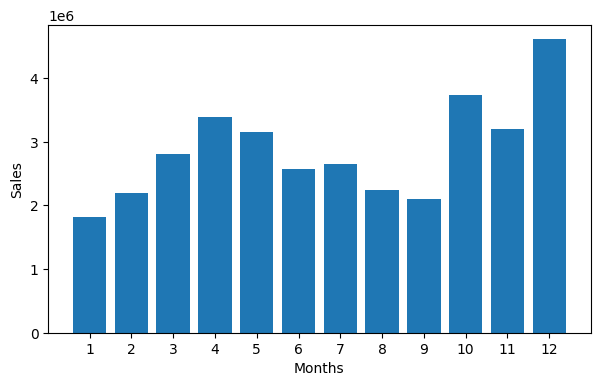

In [29]:
plt.figure(figsize=(7,4))
plt.bar(x=data.index,height=data['Sales'])
plt.xticks(data.index)

plt.xlabel('Months')
plt.ylabel('Sales')
plt.show()

In [33]:
df.groupby('Month').agg({'Sales':'sum'})

,Sales
Month,
1,1820713.16
2,2199378.08
3,2804273.35
4,3389217.98
5,3150604.24
6,2576268.20
7,2646311.32
8,2241059.39
9,2094450.33
